## Author: Paweł Jelonek <br> Date: 30.05.2021
### Machine learning course:<br> Lecture 4 - Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,svm,tree
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

plt.rcParams["figure.figsize"]=(20, 10)

Proszę opracować paradygmat uczenia:
1.	Klasyfikator k-NN (k-Nearest Neighbors).
2.	Klasyfikator Drzewo Decyzyjne.
3.	Regresja Logistyczna
4.	Naiwny Bayes
5.	LDA (Linear Discriminant Analysis)
6.	SVM (Support Vector Machine)
7.	MLP (Multi Layer Perceptron)

W ramach danego paradygmatu uczenia przedstawić:
-   podstawy teoretyczne (krótko)
-   metody/typy
-   parametry, regularyzację, optymalizację
-   implementację (własną lub biblioteczną): uczenie, predykcja (testowanie)
-   typowe metryki wraz z metodami ich wyliczania
-   wizualizację: zbioru/modelu
-   uczenie na wybranym zbiorze danych (przy wielu metodach w ramach paradygmatu, na różnych zbiorach danych)

## <center>1. k-NN (k-Nearest Neighbors)</center>

### <center>podstawy teoretyczne</center>
Algorytm polega na:
1.  porównaniu wartości zmiennych objaśniających dla obserwacji $C$ z wartościami tych zmiennych dla każdej obserwacji
w zbiorze uczącym.
2.  wyborze $k$ (ustalona z góry liczba) najbliższych do $C$ obserwacji ze zbioru uczącego.
3.  Uśrednieniu wartości zmiennej objaśnianej dla wybranych obserwacji, w wyniku czego uzyskujemy prognozę.

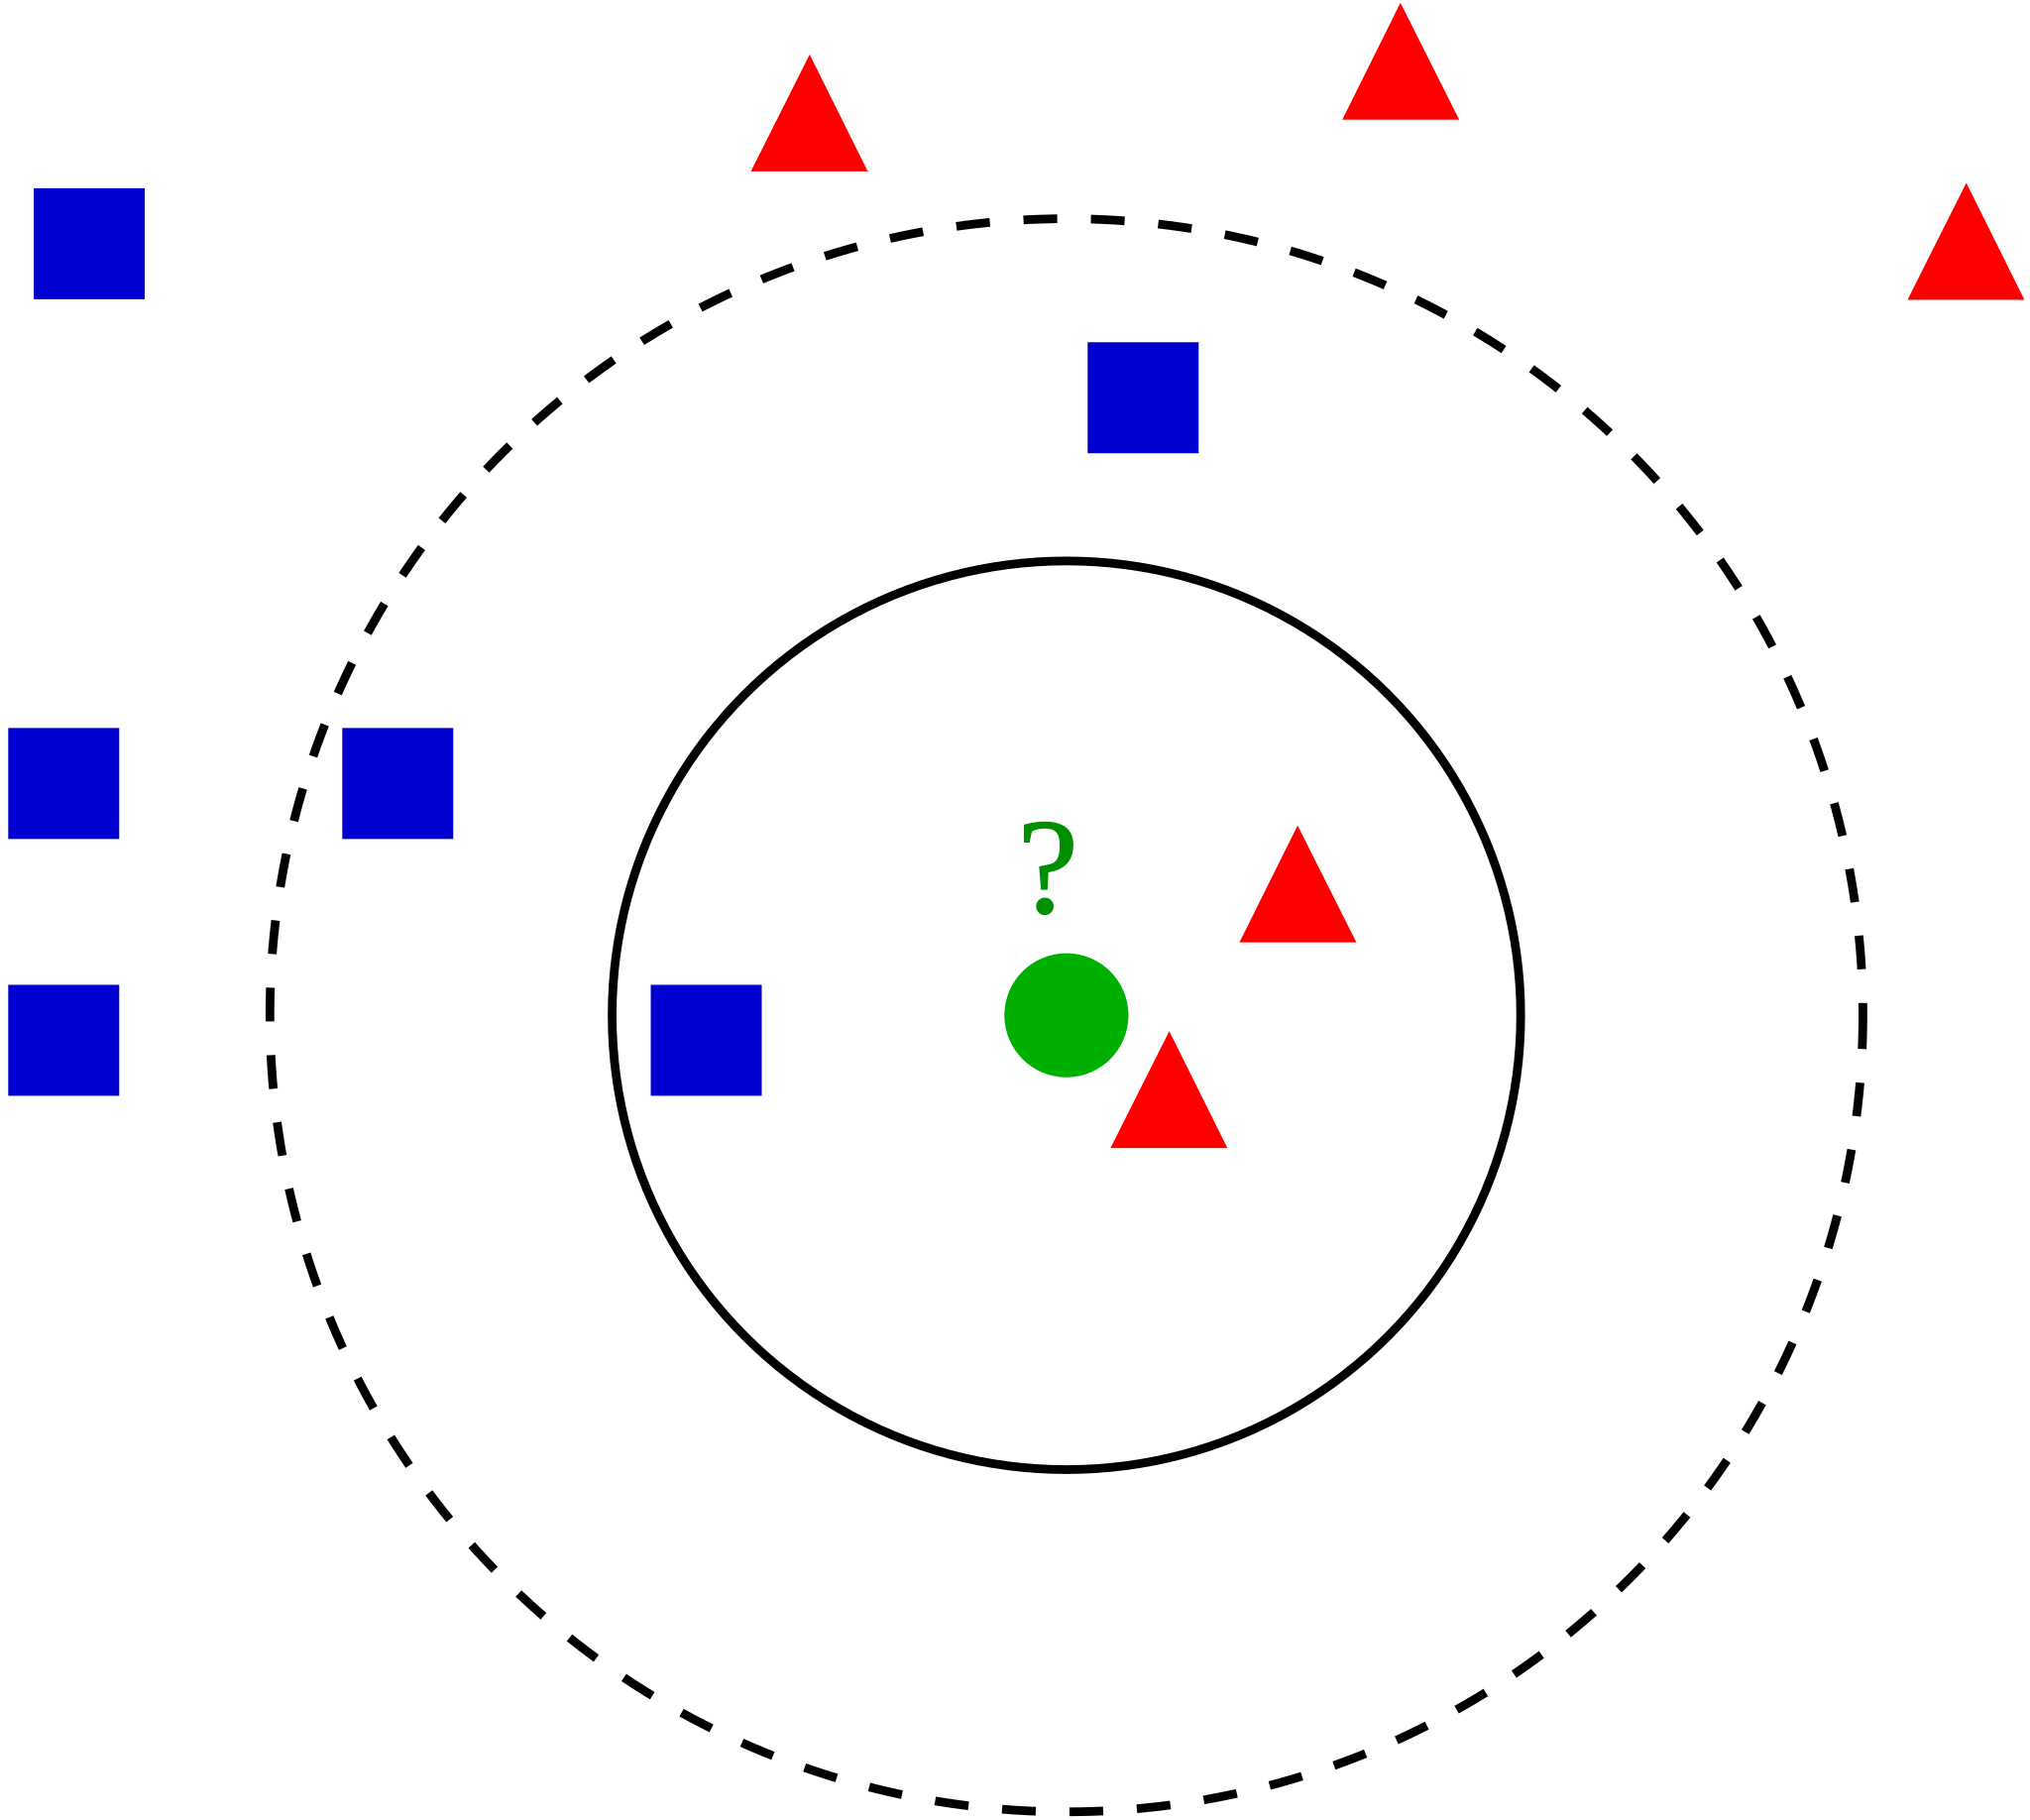

In [2]:
SVG(url="https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg")

In [3]:
df = datasets.load_iris()

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<center>Dzielimy naszą bazę na atrybuty i klasy</center>

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

### <center>Aby uniknac przeuczenia dzielimy zbior w proporcjach 70/30</center>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
def k_nearest_classifier(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray, n_neighbors: int = 5):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    plot_con_matrix(df.target_names, classifier, x_test, y_test)
    print("METRICS:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    calc_error_for_k_values(range(1,40), x_train, x_test, y_train, y_test)

In [8]:
def calc_error_for_k_values(range_values: range, x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray):
    error = []
    for i in range_values:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))

    plt.plot(range_values, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    plt.show()

In [9]:
def plot_con_matrix(class_names, classifier, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.grid(False)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

Confusion matrix, without normalization
[[23  0  0]
 [ 0 11  1]
 [ 0  0 10]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.91666667 0.08333333]
 [0.         0.         1.        ]]


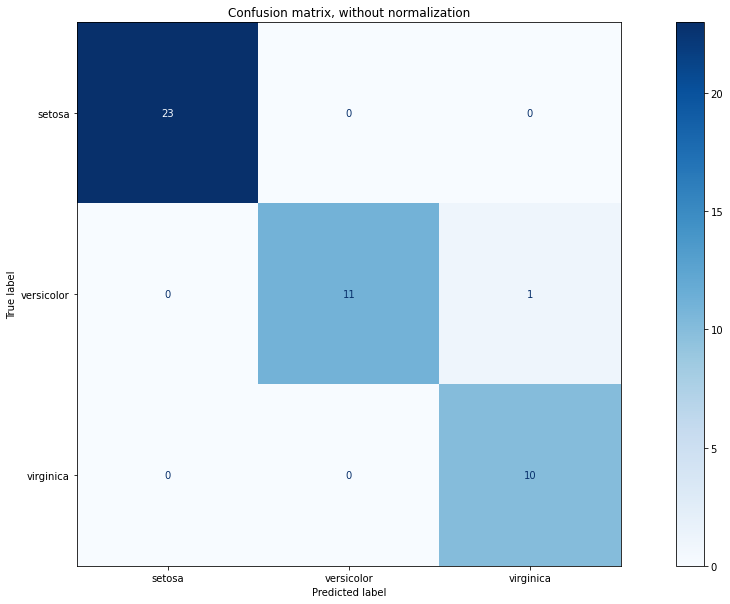

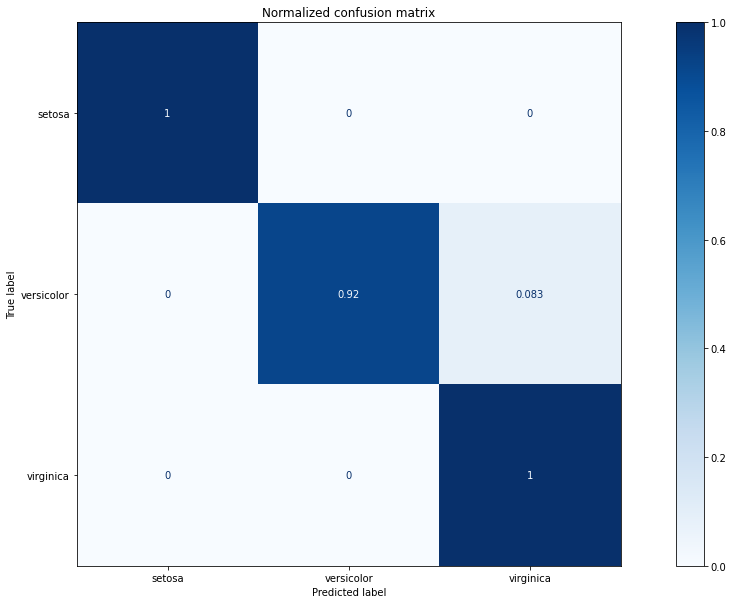

METRICS:
[[23  0  0]
 [ 0 11  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.98        45
      macro avg       0.97      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



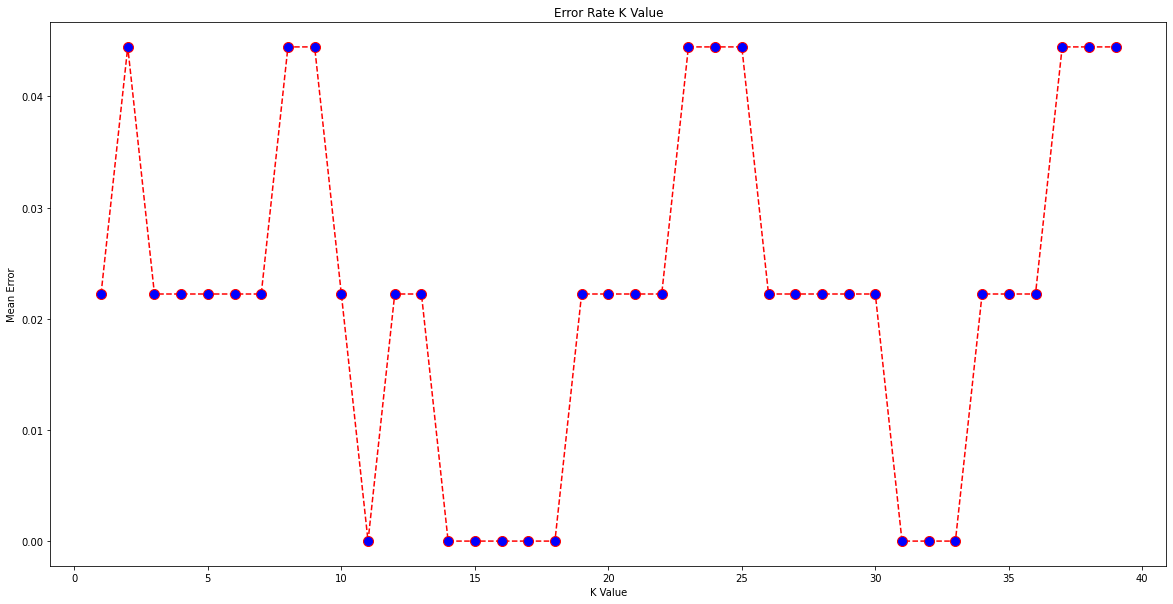

In [10]:
k_nearest_classifier(X_train, X_test, y_train, y_test)

### <center>2. Decision Tree</center>


### <center>podstawy teoretyczne</center>
Drzewa decyzyjne w uczeniu maszynowym służą do wyodrębniania wiedzy z zestawu przykładów .
Zakładamy, że posiadamy zestaw przykładów: obiektów opisanych przy pomocy atrybutów, którym
przyporządkowujemy jakąś decyzję.

In [11]:
Image(url="https://media.geeksforgeeks.org/wp-content/uploads/decisionTree.png")

In [12]:
def decision_tree_classifier(x: pd.DataFrame, y: np.ndarray, title: str, test_size: float = 0.3):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=1, stratify=y)
    clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
    clf = clf_tree.fit(X_train, y_train)
    tree.plot_tree(clf)
    plt.show()
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    plt.rcParams["figure.figsize"]=(7, 7)
    plot_decision_regions(X_combined, y_combined, clf=clf_tree)
    plt.xlabel('{} length [cm]'.format(title))
    plt.ylabel('{} width [cm]'.format(title))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

<center>NOTE: Wczytujemy iris z datasets ponieważ klasy są już znormalizowane</center>

In [13]:
iris = datasets.load_iris()
X = dataset.iloc[:, 0:2].values
y = iris.target

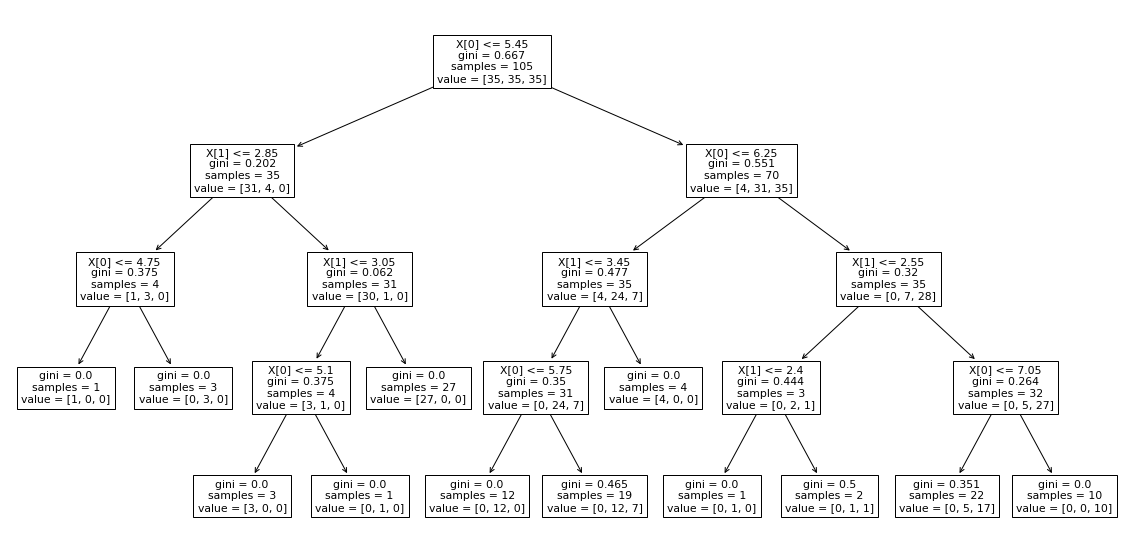

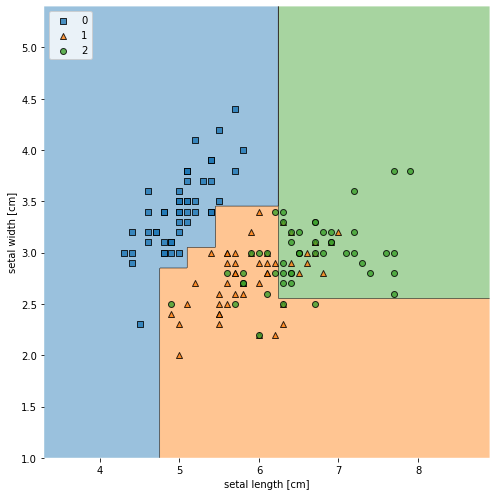

In [14]:
decision_tree_classifier(X, y, "setal")

In [15]:
iris = datasets.load_iris()
X = dataset.iloc[:, 2:-1].values
y = iris.target

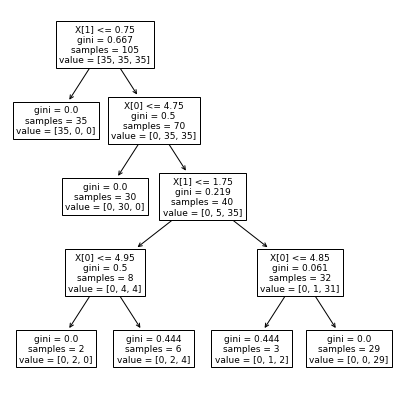

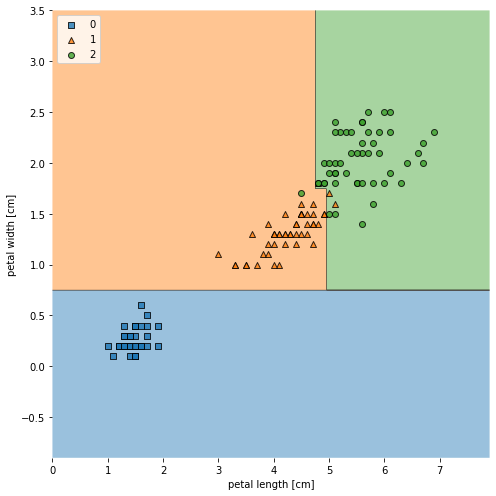

In [16]:
decision_tree_classifier(X, y, "petal")

## <center>3. Logistic Regression</center>

### <center>podstawy teoretyczne</center>
Jedną z najpopularniejszych odmian analizy regresji jest regresja logistyczna.
Najważniejszą cechą regresji logistycznej jest to, że zmienna zależna jest zmienną
dychotomiczną, czyli przyjmuje dwie wartości, najczęściej $0$ i $1.$ </br>
Sytuacja taka występuje w przypadku, gdy określamy wystąpienie bądź brak wystąpienia pewnego
zdarzenia, zjawiska, np: śmierć, choroba.

In [17]:
def logistic_regression(x: pd.DataFrame, y: pd.DataFrame, test_size: float = 0.3):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    model = LogisticRegression()
    model.fit(x_train, y_train) #Training the model
    plot_con_matrix(df.target_names, model, x_test, y_test)
    predictions = model.predict(x_test)
    print(classification_report(y_test, predictions))

Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


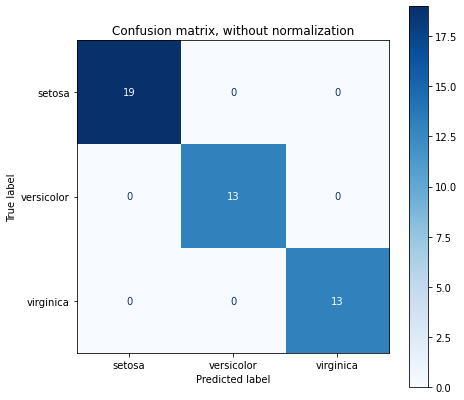

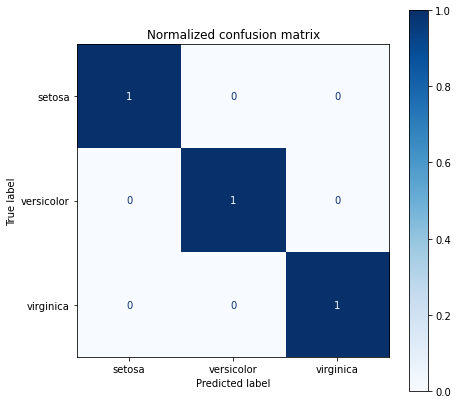

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
logistic_regression(X, y)

## <center>4. Naiwny Bayes</center>

### <center>podstawy teoretyczne</center>
Naiwny klasyfikator Bayesowski, bazujący na twierdzeniu Bayesa, nadaje się szczególnie do problemów o
bardzo wielu wymiarach na wejściu. Mimo prostoty metody, często działa ona lepiej od innych, bardzo
skomplikowanych metod klasyfikujących.
<br><center>Twierdzenie Bayesa $P(A|B) =	\frac{P(B | A)P(A)}{P(B)}$</center>

In [19]:
Image(url="https://miro.medium.com/max/1200/0*qFuHAV7Vd09064q-.jpeg")

In [20]:
def gaussian(x: pd.DataFrame, y: pd.DataFrame, test_size: float = 0.3):
    gaussian = GaussianNB()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    gaussian.fit(x_train, y_train)
    Y_pred = gaussian.predict(x_test)
    plot_con_matrix(df.target_names, gaussian, x_test, y_test)
    print(classification_report(y_test, Y_pred))

Confusion matrix, without normalization
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]]


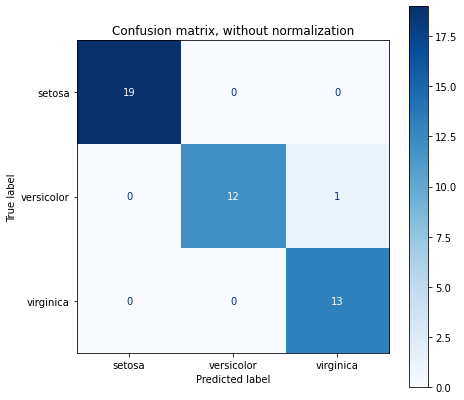

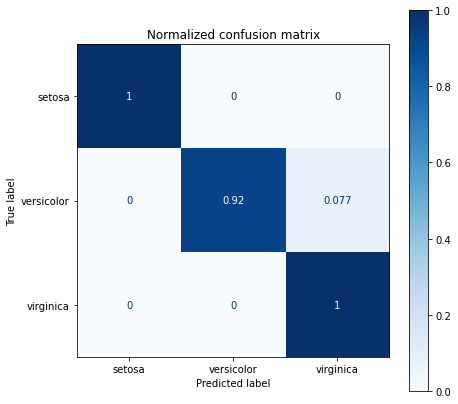

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [21]:
gaussian(X,y)

## <center>5.	LDA (Linear Discriminant Analysis)</center>

### <center>podstawy teoretyczne</center>
Liniowa analiza dyskryminacyjna i związany z nią liniowy dyskryminator Fishera są używanie w uczeniu maszynowym
do znalezienia liniowej kombinacji cech, które najlepiej rozróżniają dwie lub więcej klas obiektów lub zdarzeń.
Wynikowe kombinacje są używane jako klasyfikator liniowy lub, częściej, służą redukcji wymiarów do późniejszej
klasyfikacji statystycznej.

In [22]:
def lda(x: pd.DataFrame, y: pd.DataFrame, test_size: float = 0.3):
    lda = LinearDiscriminantAnalysis(n_components=2)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    lda.fit(x_train, y_train)
    Y_pred = lda.predict(x_test)
    plot_con_matrix(df.target_names, lda, x_test, y_test)
    print(classification_report(y_test, Y_pred))

Confusion matrix, without normalization
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.94444444 0.05555556]
 [0.         0.         1.        ]]


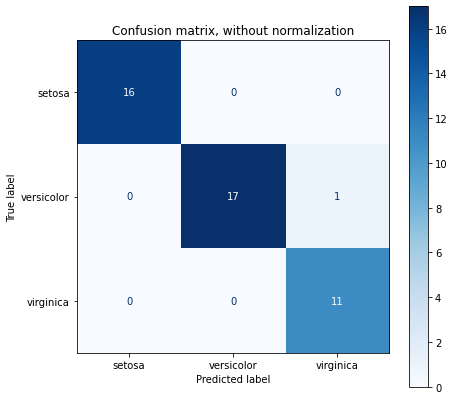

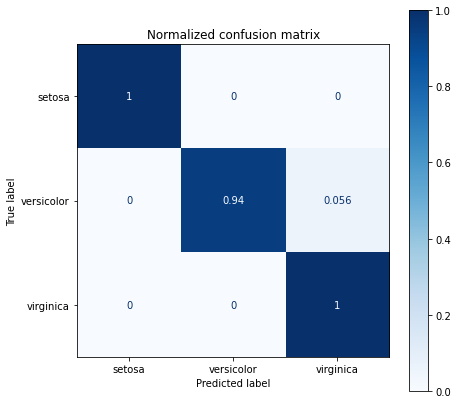

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [23]:
lda(X,y)

## <center>6.	SVM (Support Vector Machine)</center>

### <center>podstawy teoretyczne</center>
Metoda wektorów nośnych realizuje zadania klasyfikacyjne konstruując w wielowymiarowej przestrzeni hiperpłaszczyzny
oddzielające przypadki należące do różnych klas. Możemy tu jednak również wykonać regresję, a oba te zadania, dla
wielu zmiennych, ciągłych i skategoryzowanych. Dla każdej zmiennej skategoryzowanej tworzony jest zestaw zmiennych
z kodami określającymi przynależność każdego przypadku (0 lub 1).


In [24]:
Image(url="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288454/index2_ub1uzd.png")

In [25]:
def support_vertical_machine(x: pd.DataFrame, y: pd.DataFrame, test_size: float = 0.3):
    svc = svm.SVC(kernel='linear')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    svc.fit(x_train, y_train)
    Y_pred = svc.predict(x_test)
    plot_con_matrix(df.target_names, svc, x_test, y_test)
    print(classification_report(y_test, Y_pred))

Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


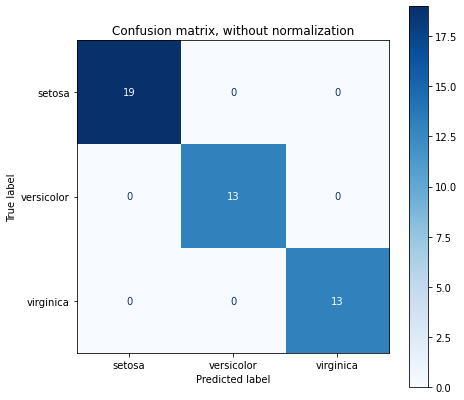

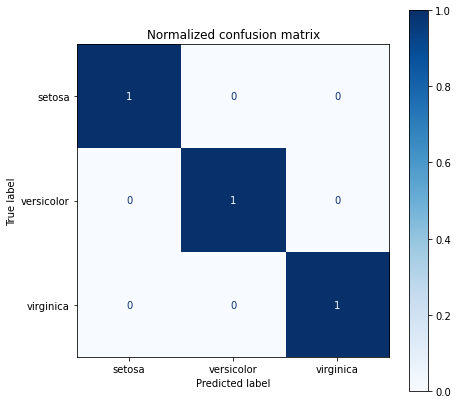

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [26]:
support_vertical_machine(X,y)

## <center>7.	MLP (Multi Layer Perceptron)</center>

### <center>podstawy teoretyczne</center>
najpopularniejszy typ sztucznych sieci neuronowych. Sieć tego typu składa się zwykle z jednej warstwy wejściowej, kilku
warstw ukrytych oraz jednej warstwy wyjściowej. Warstwy ukryte składają się najczęściej z neuronów McCullocha-Pittsa.
Ustalenie właściwej liczby warstw ukrytych oraz liczby neuronów znajdujących się w poszczególnych warstwach jest
trudnym zagadnieniem, które musi rozwiązać twórca sieci neuronowej. Warstwa wyjściowa może składać się z neuronów
liniowych (w przypadku regresji) lub neuronów nieliniowych (w przypadku klasyfikacji). Trenowanie sieci typu MLP
możliwe jest dzięki zastosowaniu metody wstecznej propagacji błędów.

Perceptron wielowarstwowy można zapisać jako funkcję:</br><center>
$y = f(x, \theta)$ </br></center>
gdzie:</br>
$y$ - wyjście sieci</br>
$x$ - wejście sieci</br>
$\theta$ - parametry(wagi) określone podczas uczenia się sieci</br>
Sieć neuronowa zwana jest siecią ponieważ składa się z wielu warstw. Funkcja $f$ z powyższego wzoru jest tak naprawdę
złożeniem wielu funkcji:</br>
$f(x) = f^{(n)}(...f^{3}(f^{2}(f^{1}(x))))$

In [27]:
def mlp(x: pd.DataFrame, y: pd.DataFrame, test_size: float = 0.5):
    clf = MLPClassifier(random_state=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_test)
    plot_con_matrix(df.target_names, clf, x_test, y_test)
    print(classification_report(y_test, Y_pred))

Confusion matrix, without normalization
[[29  0  0]
 [ 0 22  1]
 [ 0  0 23]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.95652174 0.04347826]
 [0.         0.         1.        ]]


C:\Users\pawst\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


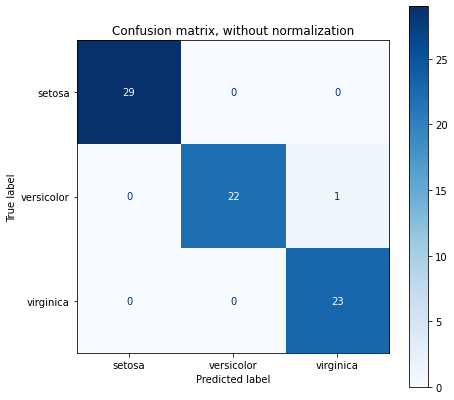

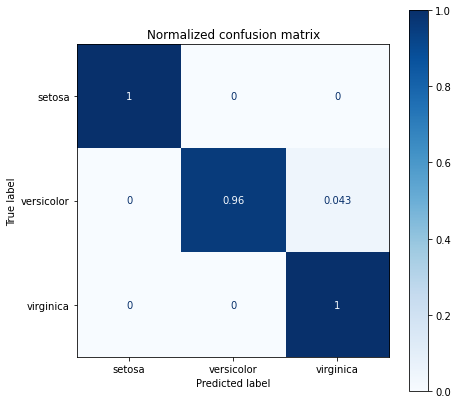

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       1.00      0.96      0.98        23
 Iris-virginica       0.96      1.00      0.98        23

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75



In [28]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
mlp(X,y)